In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Data for CoF predictions:
datas = ['8mm CoF runs/8mm run 1', '8mm CoF runs/8mm run 2',
        '8mm CoF runs/8mm run 3', '8mm CoF runs/8mm run 4',
        '8mm CoF runs/8mm run 5', '8mm CoF runs/8mm run 6',
        '8mm CoF runs/8mm run 7', '8mm CoF runs/8mm run 8',
        '8mm CoF runs/8mm run 9']

v_avs = []
# v_maxs = []
CoRs = []
CoFs = []
CoRFs = []
for i in datas:
    datasr = pd.read_csv(i)
    v_avs.append(float(datasr['value'][34]))
#     v_maxs.append(float(datasr['value'][33]))
    CoRs.append(float(datasr['value'][1]))
    CoFs.append(float(datasr['value'][22]))
    CoRFs.append(float(datasr['value'][23]))
    
# Define input features (X) and target variables (y)
X = []
no_rows = len(datas)
no_cols = 1
for i in range(no_rows):
    row = []
    for j in range(no_cols):
        row.append(v_avs[i])
#         row.append(v_maxs[i])
    X.append(row)

y = []

no_rows1 = len(datas)
no_cols1 = 1
for i in range(no_rows1):
    row1 = []
    for j in range(no_cols1):
        row1.append(CoRs[i])
        row1.append(CoFs[i])
        row1.append(CoRFs[i])
    y.append(row1)
    
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# print(f"Mean Squared Error (MSE): {mse}")
# print(f"Mean Absolute Error (MAE): {mae}")
# print('X_test:',X_test)
# print('y_pred:',y_pred)
# print('y_test;',y_test)

sample_1 = y_test[0]
sample_2 = y_test[1]

CoR_old = sample_1[0]
CoF_old = sample_1[1]
CoRF_old = sample_1[2]

sample1 = y_pred[0]
sample2 = y_pred[1]

CoR_new = sample1[0]
CoF_new = sample1[1]
CoRF_new = sample1[2]

#MFiX input File editing time:

# start_line = 225 
# end_line = 258  
# props = pd.read_csv('C:/Users/nickp/PhysTwin+bucket.rev1/PhysTwin+bucket.rev1.mfx', skiprows=range(0, start_line), nrows=end_line - start_line, sep='=')
# # display(props)

# props.iloc[1,1] = CoR_new
# props.iloc[23,1] = CoF_new
# props.iloc[23,1] = CoRF_new
# props.to_csv('DEM_inputs_new')

with open('C:/Users/nickp/PhysTwin+bucket.rev1/PhysTwin+bucket.rev1.mfx', 'r') as file:
    mfx_lines = file.readlines()
    
def replace_value(line_number, new_value):
    parts = mfx_lines[line_number].split('=')
    if len(parts) == 2:
        parts[1] = str(new_value)
        mfx_lines[line_number] = '= '.join(parts) + '\n'

# Replace values in the MFX file
replace_value(249, CoF_new)  

# Write the updated MFX content back to the file # use this for checks before editing mfx in overall mfx edit
with open('DEM_inputs_new_8mm', 'w') as file:
    file.writelines(mfx_lines)
    
def CoFric(velocities):
    y_new1 = model.predict([velocities])
    ynew1 = y_new1[0][1]
    return ynew1

# print(CoFric([0.98]))

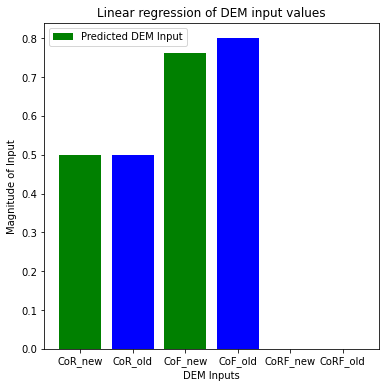

In [10]:
# import matplotlib.pyplot as plt

# x = [1,2,3,4,5,6]
# heights=[CoR_new,CoR_old ,CoF_new ,CoF_old ,CoRF_new, CoRF_old]
# colors = ['green', 'blue','green', 'blue','green', 'blue']
# tick_lables=['CoR_new','CoR_old' ,'CoF_new' ,'CoF_old' ,'CoRF_new', 'CoRF_old']
# labels=['Predicted DEM Input']
# plt.figure(figsize=(6,6))
# plt.title('Linear regression of DEM input values')
# plt.bar(x, height=heights, color=colors, tick_label = tick_lables)
# plt.legend(labels)
# plt.ylabel('Magnitude of Input')
# plt.xlabel('DEM Inputs')
# plt.show()

In [4]:
# print(v_avs,
# v_maxs,
# CoRs,
# CoFs,
# CoRFs)

In [5]:
#exctractions checked and good
#input into mfx file checked and good
#function checked and good
#changed to vavg only 